A Gaussian mixture model (GMM) is a **probabilistic model that assumes that the
instances were generated from a mixture of several Gaussian distributions whose
parameters are unknown**. All the instances generated from a single Gaussian distribution
form a cluster that typically looks like an ellipsoid. Each cluster can have a different
ellipsoidal shape, size, density, and orientation.When
you observe an instance, you know it was generated from one of the Gaussian distributions,
but you are not told which one, and you do not know what the parameters of
these distributions are.

There are several GMM variants.The simplest variantis GaussianMixture class(must know in advance the no. k of Gaussian distributions.
The dataset X is assumed to have been generated through the following
probabilistic process:

• For each instance, a cluster is picked randomly from among k clusters. The probability
of choosing the jth cluster is defined by the cluster’s weight, ϕ(j).The index
of the cluster chosen for the ith instance is noted z(i).

• If z(i)=j, meaning the ith instance has been assigned to the jth cluster, the location
x(i) of this instance is sampled randomly from the Gaussian distribution with
mean μ(j) and covariance matrix Σ(j).

In [4]:
from sklearn.mixture import GaussianMixture

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [8]:
gm.weights_

array([0.30118609, 0.33333333, 0.36548058])

In [9]:
gm.means_

array([[5.91697517, 2.77803998, 4.20523542, 1.29841561],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.54632887, 2.94943079, 5.4834877 , 1.98716063]])

In [10]:
gm.covariances_

array([[[0.27550587, 0.09663458, 0.18542939, 0.05476915],
        [0.09663458, 0.09255531, 0.09103836, 0.04299877],
        [0.18542939, 0.09103836, 0.20227635, 0.0616792 ],
        [0.05476915, 0.04299877, 0.0616792 , 0.03232217]],

       [[0.121765  , 0.097232  , 0.016028  , 0.010124  ],
        [0.097232  , 0.140817  , 0.011464  , 0.009112  ],
        [0.016028  , 0.011464  , 0.029557  , 0.005948  ],
        [0.010124  , 0.009112  , 0.005948  , 0.010885  ]],

       [[0.38741443, 0.09223101, 0.30244612, 0.06089936],
        [0.09223101, 0.11040631, 0.08386768, 0.0557538 ],
        [0.30244612, 0.08386768, 0.32595958, 0.07283247],
        [0.06089936, 0.0557538 , 0.07283247, 0.08488025]]])

This class relies on the **Expectation-Maximization (EM) algorithm**, which has many similarities with the K-Means algorithm:

it also initializes the cluster parameters randomly, then it repeats two steps until convergence, first assigning instances to clusters **(this is called the expectation step)** and then updating the clusters **(this is called the maximization step)**. 

In the context of clustering, you can think of **EM as a generalization of K-Means** that not only finds the cluster centers (μ(1) to μ(k)), but also their size, shape, and orientation (Σ(1) to Σ(k)), as well as their relative weights (ϕ(1) to ϕ(k)). 

**Unlike KMeans, EM uses soft cluster assignments, not hard assignments**.

For each instance, during the expectation step, the algorithm estimates the probability that it belongs to each cluster (based on the current cluster parameters). Then, during the maximization step, each cluster is updated using all the instances in the dataset, with each instance weighted by the estimated probability that it belongs to that cluster.
These probabilities are called the **responsibilities of the clusters for the instances.** During the maximization step, each cluster’s update will mostly be impacted by the instances it is most responsible for.

**Unfortunately, just like K-Means, EM can end up converging to poor solutions, so it needs to be run several times, keeping only the best solution. This is why we set n_init to 10. Be careful: by default n_init is set to 1.**

In [11]:
gm.converged_

True

In [12]:
gm.n_iter_

17

Now that you have an estimate of the location, size, shape, orientation, and relative
weight of each cluster, the model can easily assign each instance to the most likely
cluster (hard clustering) or estimate the probability that it belongs to a particular
cluster (soft clustering). Just use the **predict() method for hard clustering, or the
predict_proba() method for soft clustering**.

In [14]:
gm.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [15]:
gm.predict_proba(X)

array([[9.06516804e-044, 1.00000000e+000, 6.39829159e-035],
       [8.53836828e-031, 1.00000000e+000, 2.59954184e-028],
       [9.37295905e-036, 1.00000000e+000, 4.21198692e-030],
       [1.46701195e-031, 1.00000000e+000, 2.71194113e-026],
       [3.36751068e-046, 1.00000000e+000, 2.68318787e-035],
       [8.48608974e-045, 1.00000000e+000, 3.36012794e-035],
       [8.60802283e-036, 1.00000000e+000, 6.26078635e-029],
       [5.91440044e-040, 1.00000000e+000, 6.24083932e-032],
       [2.15420817e-027, 1.00000000e+000, 2.73560964e-024],
       [1.98301504e-035, 1.00000000e+000, 9.44427381e-029],
       [3.71910256e-049, 1.00000000e+000, 6.19144802e-038],
       [1.87444991e-038, 1.00000000e+000, 3.03045219e-029],
       [1.18922833e-033, 1.00000000e+000, 2.07458621e-028],
       [4.60969420e-034, 1.00000000e+000, 7.36953464e-028],
       [4.30870613e-062, 1.00000000e+000, 3.91524413e-048],
       [2.57581224e-063, 1.00000000e+000, 1.43839472e-046],
       [4.22325633e-049, 1.00000000e+000

A Gaussian mixture model is a **generative model**, meaning you can sample new
instances from it (note that they are ordered by cluster index).

It is also possible to estimate the density of the model at any given location.

In [16]:
gm.score_samples(X)

array([ 1.57050082,  0.73787138,  1.14436656,  0.92913238,  1.411028  ,
       -0.09451903,  0.05266884,  1.62442195,  0.27082378,  0.16706624,
        0.83489877,  0.77168582,  0.29597841, -1.79224582, -3.41557928,
       -2.10529279, -1.12995447,  1.47503579, -0.84612536,  0.97699215,
       -0.92934784,  0.41079066, -3.83509616, -1.88906058, -3.17355662,
       -0.12403068,  0.51111724,  1.37663152,  1.12464925,  0.69029112,
        0.78206572, -0.69467132, -2.12834347, -0.8778815 ,  1.153231  ,
        0.11508687, -1.11928741,  0.22543724,  0.13115634,  1.49896403,
        0.94007659, -4.48978774, -0.34371496, -4.48037212, -2.58855877,
        0.67996207,  0.3937127 ,  1.04001332,  1.16051416,  1.54721281,
       -2.04219856, -0.26690497, -0.85097585, -2.32641778, -1.1625818 ,
       -0.79356973, -0.81650435, -1.40144428, -0.44903274, -1.64498537,
       -2.59281522, -0.60402676, -2.52104033, -0.11016408, -1.92916117,
       -1.15964891, -1.27337947, -2.94118443, -5.17236275,  0.26

It estimates the **log of the probability density function (PDF)** at that location.
The greater the score, the higher the density .

If you compute the exponential of these scores, you get the value of the PDF at the
location of the given instances. These are not probabilities, but probability densities:
they can take on any positive value, not just a value between 0 and 1. To estimate the
probability that an instance will fall within a particular region, you would have to
integrate the PDF over that region (if you do so over the entire space of possible
instance locations, the result will be 1).

In [21]:
import numpy as np
resolution = 100

pdf = np.exp(gm.score_samples(X))
pdf_probas = pdf * (1 / resolution) ** 2
sum(pdf_probas)

0.012450078494104793

**When there are many dimensions, or many clusters, or few instances**, EM can struggle to converge to the optimal solution. You might need to reduce the difficulty of the task by limiting the number of parameters
that the algorithm has to learn. One way to do this is to **limit the range of shapes and
orientations that the clusters can have**. This can be achieved by imposing constraints
on the covariance matrices. To do this, set the covariance_type hyperparameter to
one of the following values.


* `"full"` (default): no constraint, all clusters can take on any ellipsoidal shape of any size.
* `"tied"`: all clusters must have the same shape, which can be any ellipsoid (i.e., they all share the same covariance matrix).
* `"spherical"`: all clusters must be spherical, but they can have different diameters (i.e., different variances).
* `"diag"`: clusters can take on any ellipsoidal shape of any size, but the ellipsoid's axes must be parallel to the axes (i.e., the covariance matrices must be diagonal).

The computational complexity of training a GaussianMixture
model depends on the number of instances m, the number of
dimensions n, the number of clusters k, and the constraints on the
covariance matrices. If covariance_type is **"spherical or "diag",
it is O(kmn)**, assuming the data has a clustering structure. If covariance_type is **"tied" or "full", it is O(kmn^2 + kn^3)**, so it will not
scale to large numbers of features.

### Anomaly Detection Using Gaussian Mixtures
Say it is equal to 4%. You then set the density threshold to be the value that
results in having 4% of the instances located in areas below that threshold density. If
you notice that you get too many false positives (i.e., perfectly good products that are
flagged as defective), you can lower the threshold. Conversely, if you have too many
false negatives (i.e., defective products that the system does not flag as defective), you
can increase the threshold. This is the usual precision/recall trade-off .

In [6]:
import numpy as np
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]
anomalies

array([[4.5, 2.3, 1.3, 0.3],
       [6.2, 2.2, 4.5, 1.5],
       [7.7, 3.8, 6.7, 2.2],
       [7.7, 2.6, 6.9, 2.3],
       [7.9, 3.8, 6.4, 2. ],
       [6.1, 2.6, 5.6, 1.4]])

Gaussian mixture models try to fit all the data, including the outliers,so if you have too many of them, this will bias the model’s view of “normality,” and some outliers may wrongly be considered as normal. If this happens, you can try to fit the model once, use it to detect and remove the most extreme outliers, then fit the model again on the cleaned-up dataset. Another approach is to use robust covariance estimation methods (EllipticEnvelope class).

### Selecting the Number of Clusters
But with Gaussian mixtures, it is not possible to use these
metrics because they are not reliable when the clusters are not spherical or have different
sizes. Instead, you can try to find the model that minimizes a theoretical information
criterion, such as the Bayesian information criterion (BIC) or the Akaike
information criterion (AIC)..

${BIC} = {\log(m)p - 2\log({\hat L})}$

${AIC} = 2p - 2\log(\hat L)$

* $m$ is the number of instances.
* $p$ is the number of parameters learned by the model.
* $\hat L$ is the maximized value of the likelihood function of the model. This is the conditional probability of the observed data $\mathbf{X}$, given the model and its optimized parameters.

Given a statistical
model with some parameters θ, the word “probability” is used to describe how
plausible a future outcome x is (knowing the parameter values θ), while the word
“likelihood” is used to describe how plausible a particular set of parameter values θ
are, after the outcome x is known.

Both BIC and AIC penalize models that have more parameters to learn (e.g., more clusters), and reward models that fit the data well (i.e., models that give a high likelihood to the observed data).When they differ, the model selected by the BIC tends to be simpler (fewer parameters) than the one selected by the AIC, but tends to not fit the data
quite as well (this is especially true for larger datasets).

In [7]:
gm.bic(X)

580.8594247694389

In [8]:
gm.aic(X)

448.3914718292037

In [9]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

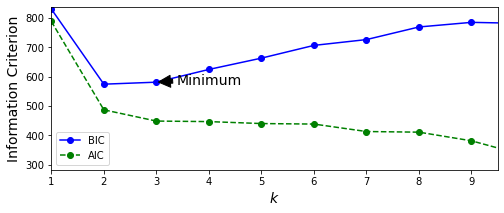

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

In [11]:
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [12]:
best_k

2

In [13]:
best_covariance_type

'full'

### Bayesian Gaussian Mixture Models
Rather than manually searching for the optimal number of clusters, you can use the
BayesianGaussianMixture class, which is capable of giving weights equal (or close)
to zero to unnecessary clusters. **Just set the number of components to a value that you believe is greater than the optimal number of clusters, and the algorithm will eliminate the unnecessary clusters automatically.**

In [14]:
from sklearn.mixture import BayesianGaussianMixture

In [15]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [16]:
np.round(bgm.weights_, 2)

array([0.42, 0.33, 0.18, 0.06, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

It is showing that 3 or 4 is the optimal number of cluster.

In [17]:
bgm_low = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=0.01, random_state=42)
bgm_high = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=10000, random_state=42)
nn = 73
bgm_low.fit(X[:nn])
bgm_high.fit(X[:nn])

BayesianGaussianMixture(max_iter=1000, n_components=10, random_state=42,
                        weight_concentration_prior=10000)

In [18]:
np.round(bgm_low.weights_, 2)

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.63, 0.01, 0.27])

In [19]:
np.round(bgm_high.weights_, 2)

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.61, 0.01, 0.29])

Gaussian mixture models work great on clusters with ellipsoidal shapes, but if you try
to fit a dataset with different shapes, you may have bad surprises.

In [20]:
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [21]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

Oops! The algorithm desperately searched for ellipsoids, so it found eight different
clusters instead of two. The density estimation is not too bad, so this model could
perhaps be used for anomaly detection, but it failed to identify the two moons.

## Other Algorithms for Anomaly and Novelty Detection
Scikit-Learn implements other algorithms dedicated to anomaly detection or novelty
detection:

PCA (and other dimensionality reduction techniques with an inverse_transform()
method)

Isolation Forest

Local Outlier Factor (LOF)

One-class SVM